#### Scikit Learn

**Scikit Learn** - это один из пакетов scikit и очень простой в использовании пакет для машинного обучения. Он реализует множество алгоритмов машинного обучения. Машинное обучение - это статическое поле, алгоритм изучается на основе предоставленных данных и помогает предсказать результат не предоставленных данных.

Чтобы понять машинное обучение и его использовать применение, лучше всего рассмотреть простой пример:

Сначала нам нужно импортировать все необходимые пакеты:

In [1]:
import numpy as np
import sklearn.linear_model as skl
import pylab as py
import pandas as pd
import seaborn as sb

Мы будем использовать модель линейной регрессии. Это самый простой алгоритм, с которого можно начать: у нас есть функция **f(x) = y**, имеется несколько пар (x, y), которые соответствуют этой функции, и мы хотим предсказать **y** для других значений **x**. Это может работать и для более чем одного измерения, например, при наличии функции **f (x, y, z) = w**, и мы хотим предсказать **w** для новых кортежей **(x, y, z)**

Чтобы создать модель линейной регрессии:

In [2]:
model = skl.LinearRegression()

Каждый алгоритм в **scikit-learn** имеет подходящую функцию для обучения модели и функции прогнозирования для прогнозирования вывода для новых значений.

Создадим некоторые данные для модели:

In [5]:
xval = np.array([1,2,3,4,5]).reshape(-1,1)
yval = [1,2,3,4,5]

Мы сообщаем модели что *f(1) = 1* , *f(2) = 2* , *f(3) = 3*, и так далее – очень просто

Начнем тренировку:

In [8]:
model.fit(xval,yval)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Попробуем предсказать значение **y** для новых данных:

In [9]:
model.predict(12)

array([ 12.])

In [10]:
model.predict(44)

array([ 44.])

Мы можем видеть, что наблюдается 100% точность, поскольку все слишком тривиально. Добавим несколько ошибок:

In [11]:
xval = np.array([1,2,3,3,4,3,6,8,9,10]).reshape(-1,1)
yval = [1,2,3,4,5,6,7,7,9,10]
model.fit(xval,yval)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Используем matplotlib для визуализации данных:

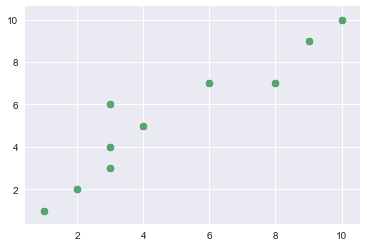

In [13]:
py.scatter(xval,yval)
py.show()

Из графика видно, что существует линейная корреляция между **x** и **y**, но она имеет некоторые ошибки.

Попробуем предсказать поведение функции:

In [14]:
model.predict(12)

array([ 11.66141732])

In [15]:
model.predict(44)

array([ 39.88188976])

Мы видим, что результаты ошибочны, но тем не менее близки к реальным результатам

#### Больше измерений

Реальные проблемы имеют куда больше одного измерения, к примеру: даны рост, вес, и размер обуви - необходимо определить по предоставленным данным, пол *хозяина* данных.

Создадим массив данных с большим количеством измерений:

In [16]:
samp=np.array([[1,2,300,14],
               [9,3,1,95],
               [5,7,11,58],
               [4,8,14,57],
               [2,1,2,27],
               [9,9,7,100],
               [12,3,21,126],
               [29,12,3,309],
               [2,40,11,90],
               [21,32,4,270],
               [7,13,8,79],
               [17,2,19,172],
               [13,24,13,159]])
df=pd.DataFrame(samp, columns=['X','Y','Z','W'])

Чтобы обрабатывать несколько измерений, используем объект dataframe из пакета Pandas:

In [17]:
df.head()

,X,Y,Z,W
0,1,2,300,14
1,9,3,1,95
2,5,7,11,58
3,4,8,14,57
4,2,1,2,27


Теперь мы можем использовать диаграмму парного графика, чтобы найти отношения между столбцами:

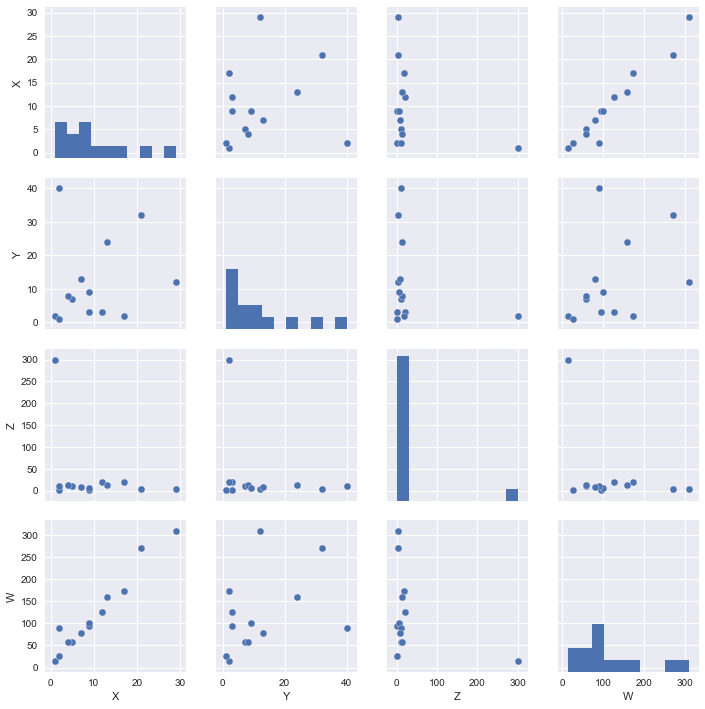

In [21]:
sb.pairplot(df)
py.show()

Данных подход позволяет очень хорошо увидеть соотношения между переменными, например, мы можем видеть, что **x** и **w** имеют сильноую зависимость.

#### Разделение данных - тренеровка и тест

Когда мы строим модель, мы хотим проверить ее правильность, для этого мы разделяем данные на тренировочные и тестовые данные. Мы используем тренировочные данные, чтобы сооздать модель, а затем проверяем ее помощью наших тестовых данных, чтобы увидеть, предсказывает ли модель результаты, которые у нас уже имеются. Например, у нас больше 13 строк.  Тогда возьмем только 8 для нашей модели:

In [22]:
xval=df[:8][['X','Y','Z']] # only first 8 rows 
yval=df[:8][['W']]
model.fit(xval,yval)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Возьмем остальные 5 строк и проверим значения, которые предсказывает модель:

In [24]:
model.predict(df[8:][['X','Y','Z']])

array([[  68.12886489],
       [ 249.65152055],
       [  87.91908068],
       [ 175.75498023],
       [ 160.41262073]])

Теперь сравним с реальными значениями, которые мы знаем:

In [25]:
df[8:]['W']

8      90
9     270
10     79
11    172
12    159
Name: W, dtype: int64

Как можно заметить, строки 8 и 9 не так уж близки к реальным значениям, но зато  10-12 дастаточно близки.

Обратите внимание, что для целей обучения мы используем очень маленький объем данных, для реальных сценариев нам требуется гораздо больше чем 13 записей.

Мы можем каким-то образом изменить модель: использовать другой алгоритм или использовать часть переменных для примера:

Проверитм коэффициенты модели:

In [26]:
model.coef_

array([[  1.00253720e+01,   1.12411075e+00,  -4.78200390e-03]])

Не турдно заметить, что **z** имеет наименьший(если не сказать, что нечтожный) эффект **(0,004)**, поэтому рекомендуется удалить его из модели:

In [27]:
xval=df[:8][['X','Y']]
yval=df[:8][['W']]
model.fit(xval,yval)
model.predict(df[8:][['X','Y']])

array([[  68.91717972],
       [ 250.38276578],
       [  87.94208619],
       [ 175.61505435],
       [ 160.85673992]])

In [28]:
df[8:]['W']

8      90
9     270
10     79
11    172
12    159
Name: W, dtype: int64

Не сказать, что это сильно повлияло на данные, но точность улучшилась.

Опять же, это небольшое улучшение, так как мы используем небольшой объем данных, в статистике мы не можем построить хорошую модель без большого количества данных.

Этот пример хорош только для понимания концепции